In [1]:
import glob
import os
from collections import Counter, defaultdict
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def analyze_word_count():
    word_counts = Counter()
    for file in glob.glob("/Users/jinyoungkim/Documents/Obsidian Vault/*.md"):
        with open(file, "r") as f:
            words = f.read().split()
            word_counts[file] = len(words)

    total_word_count = sum(word_counts.values())
    mean_word_count = np.mean(list(word_counts.values()))
    std_dev = np.std(list(word_counts.values()))

    plt.hist(list(word_counts.values()), bins=20, alpha=0.5)
    plt.title("Word Count Histogram")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()

    top_10_files = word_counts.most_common(10)
    bottom_10_files = word_counts.most_common()[:-11:-1]

    return total_word_count, mean_word_count, std_dev, top_10_files, bottom_10_files

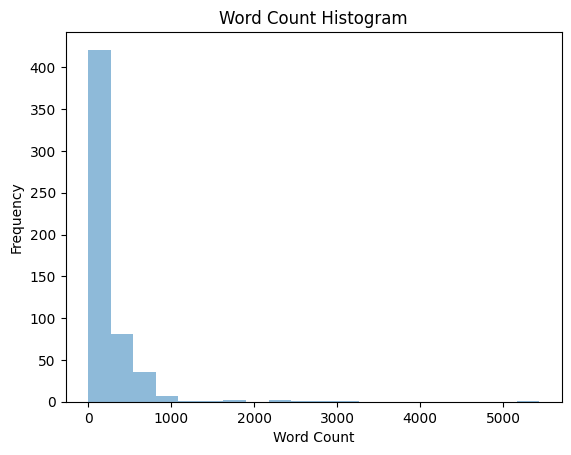

Total Word Count: 125451
Mean Word Count: 226.03783783783783
Standard Deviation: 389.8106405746705
Top 10 files: [('/Users/jinyoungkim/Documents/Obsidian Vault/QB Code.md', 5434), ('/Users/jinyoungkim/Documents/Obsidian Vault/Conformal Prediction.md', 3060), ('/Users/jinyoungkim/Documents/Obsidian Vault/Data Science Quant <> HOF Capital.md', 2808), ('/Users/jinyoungkim/Documents/Obsidian Vault/World Order, Kissinger.md', 2605), ('/Users/jinyoungkim/Documents/Obsidian Vault/Data Science Applied in HOF Capital.md', 2260), ('/Users/jinyoungkim/Documents/Obsidian Vault/Advice for a Startup.md', 2242), ('/Users/jinyoungkim/Documents/Obsidian Vault/G-Research Interviewing Process.md', 1734), ('/Users/jinyoungkim/Documents/Obsidian Vault/Data Science Projects <> S32.md', 1658), ('/Users/jinyoungkim/Documents/Obsidian Vault/Candes Maths Problems Be Solved P1.md', 1601), ('/Users/jinyoungkim/Documents/Obsidian Vault/China.md', 1201)]
Bottom 10 files: [('/Users/jinyoungkim/Documents/Obsidian Vau

In [5]:
(total_word_count,
    mean_word_count,
    std_dev,
    top_10_files,
    bottom_10_files,
) = analyze_word_count()
print(f"Total Word Count: {total_word_count}")
print(f"Mean Word Count: {mean_word_count}")
print(f"Standard Deviation: {std_dev}")
print(f"Top 10 files: {top_10_files}")
print(f"Bottom 10 files: {bottom_10_files}")

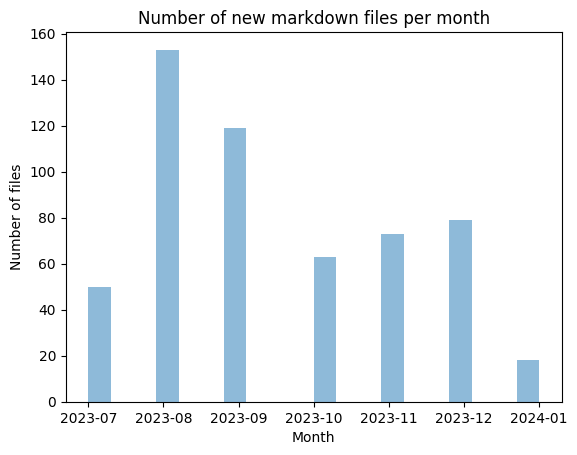

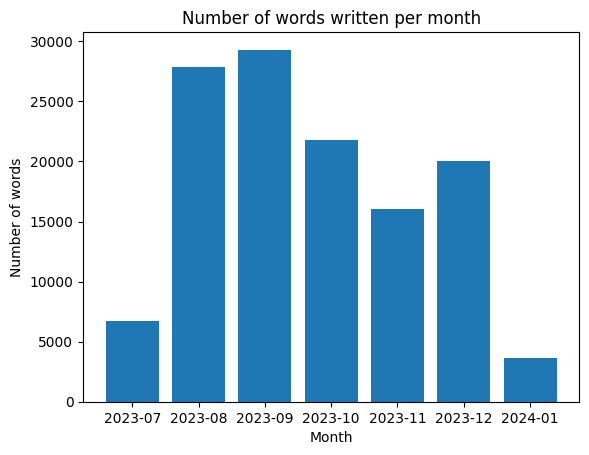

In [8]:
def analyze_activity():
    file_creation_dates = []
    words_per_month = defaultdict(int)

    for file in glob.glob("/Users/jinyoungkim/Documents/Obsidian Vault/*.md"):
        creation_time = os.path.getctime(file)
        creation_date = datetime.fromtimestamp(creation_time)
        file_creation_dates.append(creation_date.strftime("%Y-%m"))

        with open(file, "r") as f:
            words = f.read().split()
            words_per_month[creation_date.strftime("%Y-%m")] += len(words)

    file_creation_dates.sort()

    # Plotting the number of new markdown files created in a month
    plt.hist(file_creation_dates, bins=20, alpha=0.5)
    plt.title("Number of new markdown files per month")
    plt.xlabel("Month")
    plt.ylabel("Number of files")
    plt.show()

    # Sort the months and word counts together
    months, word_counts = zip(
        *sorted(zip(words_per_month.keys(), words_per_month.values()))
    )

    plt.bar(months, word_counts)
    plt.title("Number of words written per month")
    plt.xlabel("Month")
    plt.ylabel("Number of words")
    plt.show()


analyze_activity()